# YouTube Sentiment Analysis - handling emojis

### imports

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud

### Data Loading

In [3]:
df = pd.read_csv('SamsungZFlip4.csv')
df.head()

,Name,Comment,Time,Date
0,Mono,The flip nightmare 💀,2022-09-24T12:56:13Z,2022-09-24
1,Chyper,I would ñəʏɜr sɰɪ̈ʈɔħ ʈ̆ɤ̃ˀ̪̤̘ ʃ̪̯̈ˣʲæ̘̩̃ʷᶿ̯̪̈...,2022-09-24T11:51:39Z,2022-09-24
2,ApexIsBroken,I love buying the same phone over and over again,2022-09-24T09:58:30Z,2022-09-24
3,jitesh sawant,Looks like they are targeting womens for this ...,2022-09-24T09:48:19Z,2022-09-24
4,Denns,"Back in the day, the flip phones are analog ke...",2022-09-24T06:48:41Z,2022-09-24


### Data Processing

In [4]:
# dropping all columns except comment
data = df.drop(['Name', 'Time', 'Date'], axis = 1)
data.head()

,Comment
0,The flip nightmare 💀
1,I would ñəʏɜr sɰɪ̈ʈɔħ ʈ̆ɤ̃ˀ̪̤̘ ʃ̪̯̈ˣʲæ̘̩̃ʷᶿ̯̪̈...
2,I love buying the same phone over and over again
3,Looks like they are targeting womens for this ...
4,"Back in the day, the flip phones are analog ke..."


### Data Processing: Handling emojis

In [5]:
from emot.emo_unicode import UNICODE_EMOJI # For emojis

In [6]:
# Function for converting emojis into word
def convert_emojis(text):
    for emot in UNICODE_EMOJI:
        text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",","").replace(":","").split()))
    return text

In [7]:
# check
text = "The flip nightmare 💀"
convert_emojis(text)

'The flip nightmare skull'

In [8]:
# first convert the comments to string
word = ' '.join(data['Comment'].tolist())

In [9]:
# then convert all emojis in comments
words = convert_emojis(word)

### Data Processing: Removing stop words

In [10]:
# removing stop words and punctuations
def data_processing(words):
    words = words.lower()
    words = re.sub(r'\@w+|\#', '', words) 
    words = re.sub(r'[^\w\s]', '', words)
    words = re.sub("[\.\,\!\?\:\;\-\=\_]", ' ', words)
    word_tokens = word_tokenize(words)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

In [11]:
# view text
text = data_processing(words)
text

'flip nightmare skull would ñəʏɜr sɰɪʈɔħ ʈɤˀ ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ love buying phone looks like targeting womens phone back day flip phones analog keyboards screen touchscreen keyboard arrive phablet came phones bigger next best thing flipped four sided phone turns tablet still see problems like happen folded thousand times everything get loose become unstable samsung commercial face tears joy dejo de verlo grinning face sweatraising handslight skin tone failure dark middle area phone folds thing exiting good apple doesnt deal garbage dont consider samsung competitor still king consider halop competitor lol nice commercial still didnt convince join flop oh mean flip side skull must best ad samsungonly thing holding getting one camera lack ecosystemalso samsung book laptops way less powerful use well anyone gon na talk folded pizza dont samsung love commercial never switch samsung love phoneface tears joyface tears joyface tears joy grinning face big eyes nutshell lol longer buy samsung 

In [12]:
# converting text to list
text_list = text.split()
text_list

['flip',
 'nightmare',
 'skull',
 'would',
 'ñəʏɜr',
 'sɰɪʈɔħ',
 'ʈɤˀ',
 'ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ',
 'love',
 'buying',
 'phone',
 'looks',
 'like',
 'targeting',
 'womens',
 'phone',
 'back',
 'day',
 'flip',
 'phones',
 'analog',
 'keyboards',
 'screen',
 'touchscreen',
 'keyboard',
 'arrive',
 'phablet',
 'came',
 'phones',
 'bigger',
 'next',
 'best',
 'thing',
 'flipped',
 'four',
 'sided',
 'phone',
 'turns',
 'tablet',
 'still',
 'see',
 'problems',
 'like',
 'happen',
 'folded',
 'thousand',
 'times',
 'everything',
 'get',
 'loose',
 'become',
 'unstable',
 'samsung',
 'commercial',
 'face',
 'tears',
 'joy',
 'dejo',
 'de',
 'verlo',
 'grinning',
 'face',
 'sweatraising',
 'handslight',
 'skin',
 'tone',
 'failure',
 'dark',
 'middle',
 'area',
 'phone',
 'folds',
 'thing',
 'exiting',
 'good',
 'apple',
 'doesnt',
 'deal',
 'garbage',
 'dont',
 'consider',
 'samsung',
 'competitor',
 'still',
 'king',
 'consider',
 'halop',
 'competitor',
 'lol',
 'nice',
 'commercial',
 'still

### Data Processing: Stemming

In [13]:
stemmer = SnowballStemmer(language = 'english')

stem = []
for word in text_list:
    x = stemmer.stem(word)
    stem.append(x)
stem

['flip',
 'nightmar',
 'skull',
 'would',
 'ñəʏɜr',
 'sɰɪʈɔħ',
 'ʈɤˀ',
 'ʃˣʲæʷᶿɱˠʂʲʅʌɱˠʅʅɯɲˠɡ',
 'love',
 'buy',
 'phone',
 'look',
 'like',
 'target',
 'women',
 'phone',
 'back',
 'day',
 'flip',
 'phone',
 'analog',
 'keyboard',
 'screen',
 'touchscreen',
 'keyboard',
 'arriv',
 'phablet',
 'came',
 'phone',
 'bigger',
 'next',
 'best',
 'thing',
 'flip',
 'four',
 'side',
 'phone',
 'turn',
 'tablet',
 'still',
 'see',
 'problem',
 'like',
 'happen',
 'fold',
 'thousand',
 'time',
 'everyth',
 'get',
 'loos',
 'becom',
 'unstabl',
 'samsung',
 'commerci',
 'face',
 'tear',
 'joy',
 'dejo',
 'de',
 'verlo',
 'grin',
 'face',
 'sweatrais',
 'handslight',
 'skin',
 'tone',
 'failur',
 'dark',
 'middl',
 'area',
 'phone',
 'fold',
 'thing',
 'exit',
 'good',
 'appl',
 'doesnt',
 'deal',
 'garbag',
 'dont',
 'consid',
 'samsung',
 'competitor',
 'still',
 'king',
 'consid',
 'halop',
 'competitor',
 'lol',
 'nice',
 'commerci',
 'still',
 'didnt',
 'convinc',
 'join',
 'flop',
 'oh',
 '

In [14]:
# count of distinct words
df = pd.DataFrame(stem)
df = df[0].value_counts()
df.head(5)

tear       389
floor      377
samsung    318
face       311
phone      275
Name: 0, dtype: int64

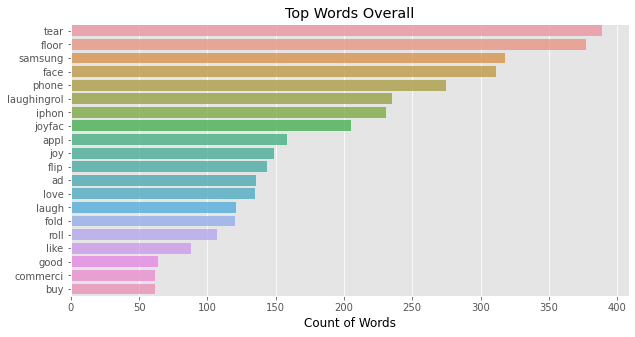

In [22]:
df = df[:20,]
fig = plt.figure(figsize = (10,5))
sns.barplot(x = df.values, y = df.index, alpha = 0.8)
plt.title('Top Words Overall')
plt.xlabel('Count of Words', fontsize = 12, color = 'black')
plt.savefig('bar1.png')
plt.show()